In [ ]:
# Leiskite vartotojui nurodyti iki trijų metreologinių stočių, ir dvi datas : nuo, iki.
# Iš meto.lt per API išgaukite istorinius
# duomenis nurodytame laikotarpyje, ir atvaizduokite grafiškai - oro temperatūrą bei vėjo greitį.

In [8]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import glob
import math
import requests
from datetime import datetime, timedelta

In [9]:
url ='https://api.meteo.lt/v1/stations'

page = requests.get(url)
status = page.status_code
r = page.json()
df=pd.DataFrame(data=r)
df.head()

,code,name,coordinates
0,akmenes-ams,Akmenės AMS,"{'latitude': 56.24992, 'longitude': 22.73081}"
1,alytaus-ams,Alytaus AMS,"{'latitude': 54.412435, 'longitude': 24.063274}"
2,anyksciu-ams,Anykščių AMS,"{'latitude': 55.51735, 'longitude': 25.1178}"
3,birstono-ams,Birštono AMS,"{'latitude': 54.603217, 'longitude': 24.035802}"
4,birzu-ams,Biržų AMS,"{'latitude': 56.193191, 'longitude': 24.774184}"


In [10]:
stotys = list(df['code'])

a= int(input('nurodykite stočių kiekį, nuo 1 iki 3'))

b=[]
for i in range(0, a):
    b.append(input(stotys))

pradzia=(input('įveskite pradžios datą, ne anksčiau kaip 2014-10-10'))
pabaiga=(input('įveskite pabaigą datą, ne vėliau kaip 2024-10-09'))

ValueError: invalid literal for int() with base 10: ''

In [11]:
a=2
b=['vilniaus-ams', 'mazeikiu-ams', 'klaipedos-ams']
pradzia='2023-08-03'
pabaiga='2023-08-04'

In [12]:
pradzia = datetime.strptime(pradzia, '%Y-%m-%d')
pabaiga = datetime.strptime(pabaiga, '%Y-%m-%d')

t1, t2, t3 = [], [], []
vg1, vg2, vg3 = [], [], []
datos=[]
current_date = pradzia

while current_date <= pabaiga:
    
    url ='https://api.meteo.lt/v1/stations/'+b[0]+'/observations/'+current_date.strftime("%Y-%m-%d")
    page = requests.get(url)
    r = page.json()
        
    for j in r['observations']:
        t1.append(j['airTemperature'])
        vg1.append(j['windSpeed'])
        datos.append(j['observationTimeUtc'])
    
    if a >= 2:
        url ='https://api.meteo.lt/v1/stations/'+b[1]+'/observations/'+current_date.strftime("%Y-%m-%d")
        page = requests.get(url)
        r = page.json()
        
        for j in r['observations']:
            t2.append(j['airTemperature'])
            vg2.append(j['windSpeed'])
            
    if a == 3:
        url ='https://api.meteo.lt/v1/stations/'+b[2]+'/observations/'+current_date.strftime("%Y-%m-%d")
        page = requests.get(url)
        r = page.json()
        
        for j in r['observations']:
            t3.append(j['airTemperature'])
            vg3.append(j['windSpeed'])
            
    current_date += timedelta(days=1)




In [13]:
tempes = [t1, t2, t3]
vejai = [vg1, vg2, vg3]

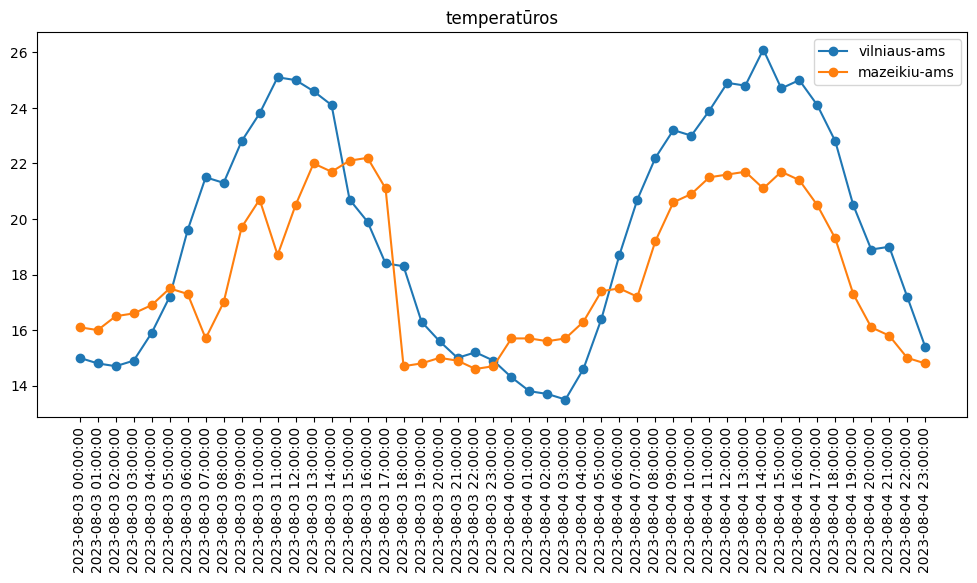

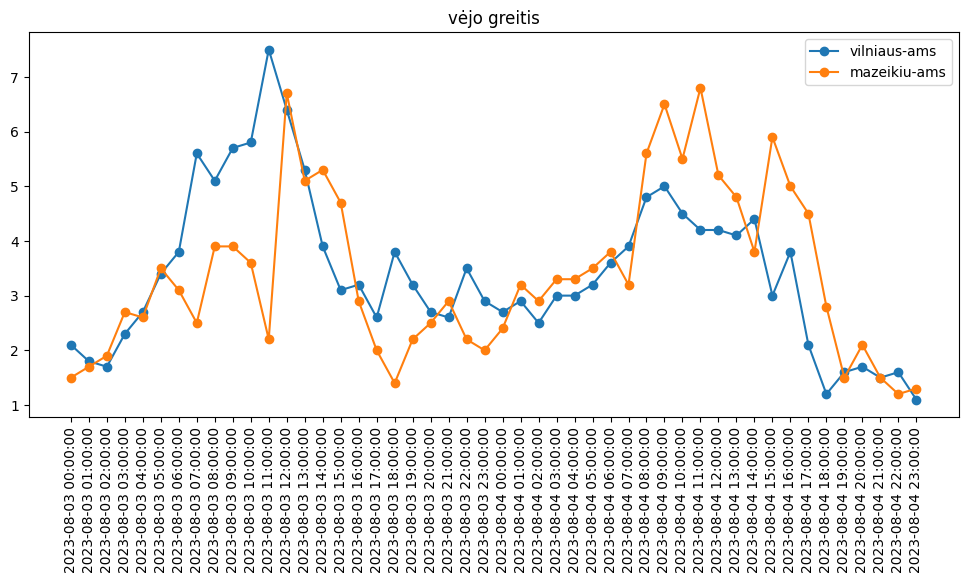

In [14]:
fig, axis = plt.subplots(figsize=(12, 5)) 
for i in range(0, a): 
    axis.plot(datos, tempes[i], label = b[i], marker ='o')
    
axis.set_xticks(datos)
axis.legend(loc='best')
plt.title('temperatūros')
plt.xticks(rotation=90)
plt.show()


fig, axis = plt.subplots(figsize=(12, 5)) 
for i in range(0, a): 
    axis.plot(datos, vejai[i], label = b[i], marker ='o')
    
axis.set_xticks(datos)
axis.legend(loc='best')
plt.title('vėjo greitis')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# https://data.gov.lt/datasets/2638/models/VietovesTemperaturaDregme/
# nuskaitykite šiuos duomenis (atsisiuntę kaip CSV ar kitu jums priimtinu būdu)
# atvaizduokite su scatter_mapbox, kuriose Lietuvos vietose yra įrengti registratoriai.
# atvaizduokite vieno bet kurio vietos registratoriaus užfiksuotas temperatūras (istorinius duomenis)
# 8 cm gylyje, paviršiuje, 15 cm aukštyje.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import glob

In [2]:
df = pd.read_csv(r'C:\Users\pauli\Downloads\VietovesTemperaturaDregme.csv')
df.head(1)

,_type,_id,_revision,_page.next,atvejo_id,vietoves_registratoriaus_id,laikas,temperatura_8cm_gylyje_dirvozemyje,temperatura_dirvozemio_pavirsiuje,temperatura_15cm_virs_dirvozemio,dirvozemio_dregme,platuma,ilguma,apytiksle_vietoves_klasifikacija
0,datasets/gov/gtc/dirvozemio_temperatura/Vietov...,0b113578-f771-4f4c-b14e-ff0ae20abe83,ea2cdfe2-86b5-465f-81af-da060b4c692d,NaN,1,LT_DU_94183509,2018-11-08T08:30:00,6.0,11.68,8.75,324,55.635334,25.295816,4


In [3]:
dfregistratoriai = df.groupby('vietoves_registratoriaus_id').agg({'platuma': 'first', 'ilguma': 'first'}).reset_index()

fig = px.scatter_mapbox(data_frame=dfregistratoriai, lon='ilguma', lat='platuma', zoom=5)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(width=800, height=600)
fig.show()

dfregistratoriai.head(25)

,vietoves_registratoriaus_id,platuma,ilguma
0,LT_DU_94183509,55.635334,25.295816
1,LT_DU_94183511,55.635198,25.295220
2,LT_DU_94183513,56.045654,24.200813
3,LT_DU_94183515,56.056991,24.177246
4,LT_DU_94183517,56.101670,22.838685
5,LT_DU_94183518,56.159036,22.761969
6,LT_DU_94183519,56.160387,22.737053
7,LT_DU_94183520,56.078044,22.853446
8,LT_DU_94183521,55.634215,25.293801
9,LT_DU_94183522,56.094091,24.608990


In [4]:
df1 = df.loc[df['vietoves_registratoriaus_id'] == 'LT_DU_94183518']

In [5]:
df1.head(1)

,_type,_id,_revision,_page.next,atvejo_id,vietoves_registratoriaus_id,laikas,temperatura_8cm_gylyje_dirvozemyje,temperatura_dirvozemio_pavirsiuje,temperatura_15cm_virs_dirvozemio,dirvozemio_dregme,platuma,ilguma,apytiksle_vietoves_klasifikacija
347750,datasets/gov/gtc/dirvozemio_temperatura/Vietov...,fb452b03-38d7-4834-b51e-9deca7112cbe,0053ff98-244f-4c8c-9400-511feeb53209,NaN,304568,LT_DU_94183518,2019-09-30T21:00:00,12.87,11.62,10.37,2693,56.159036,22.761969,4


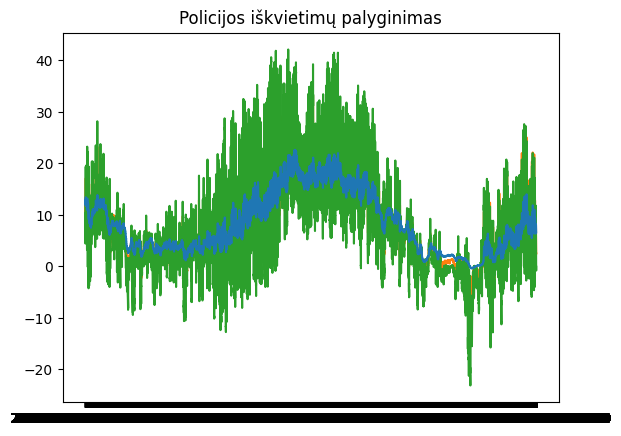

In [7]:
fig, axis = plt.subplots()
  
axis.plot(df1['laikas'], df1['temperatura_8cm_gylyje_dirvozemyje'], label = 'KET', zorder=5)
axis.plot(df1['laikas'], df1['temperatura_dirvozemio_pavirsiuje'], label = 'KET')
axis.plot(df1['laikas'], df1['temperatura_15cm_virs_dirvozemio'], label = 'KET')
# axis.plot(dfKET['menuo'], dfivairus['object_id'], label = 'Įvairūs', marker ='o')
# axis.set_xticks(dfKET['menuo'])
# axis.legend(loc='best')
plt.title('Policijos iškvietimų palyginimas')
plt.show()
